## IMPORTING DEPENDENCIES

In [4]:
import pandas as pd
import numpy as np

In [5]:
import chardet
with open(r"C:\Users\omsha\Desktop\archive (2)\spam.csv", 'rb') as f:    
    result = chardet.detect(f.read())
    encoding = result['encoding']

In [6]:
encoding

'Windows-1252'

In [7]:
df=pd.read_csv(r"C:\Users\omsha\Desktop\archive (2)\spam.csv" ,encoding=encoding)

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.drop(df.columns[[2,3,4]],axis=1,inplace=True)     

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.shape

(5572, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## DATA PREPROCESSING

In [14]:
df.rename(columns ={"v1":"output","v2":"sms"},inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["output"]=lb.fit_transform(df['output'])
df.head()                                                          

,output,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.duplicated().sum()

np.int64(403)

In [17]:
df.drop_duplicates(keep="first",inplace=True)

In [18]:
df.shape

(5169, 2)

In [19]:
df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

In [22]:
import regex
df['num_characters']=df['sms'].apply(len)

In [23]:
df.head()

,output,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omsha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
df['num_of_words']=df.apply(lambda row: len(nltk.word_tokenize(row['sms'])), axis=1)               
df.head()

,output,sms,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_of_sentences']=df.apply(lambda row: len(nltk.sent_tokenize(row['sms'])), axis=1)
df.head()

,output,sms,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
(df[df['output']==0][['num_characters','num_of_words','num_of_sentences']]).describe()

,num_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
(df[df['output']==1][['num_characters','num_of_words','num_of_sentences']]).describe()

,num_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

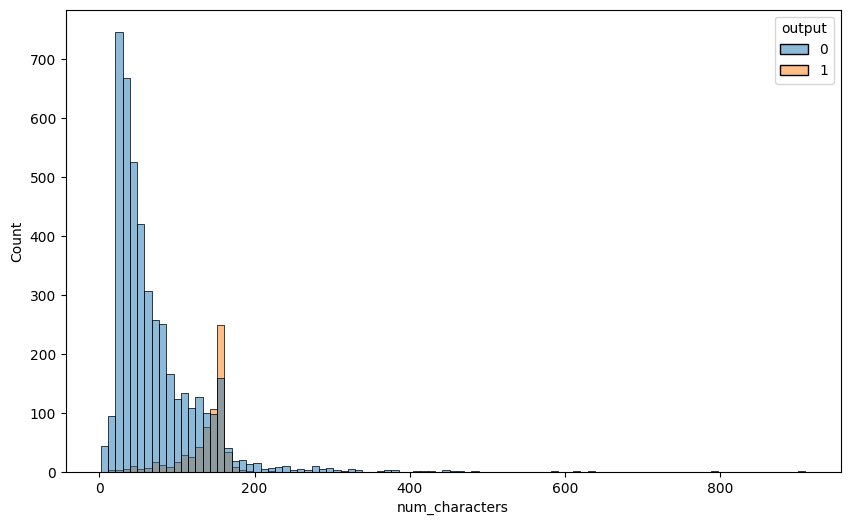

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='num_characters',hue='output')
plt.plot()

In [33]:
def lower_text(x):
  return x.lower()

In [34]:
df['sms']=df['sms'].apply(lower_text)

In [35]:
pattern = r'[^a-zA-Z0-9\s]'                   
df['sms'] = df['sms'].str.replace(pattern, '', regex=True)        
#used for text normalization

In [36]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omsha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
def remove_stopwords(x):
  tex=[]
  for i in x.split(' '):
      if(i not in stopwords.words('english')):
        tex.append(i)
  return tex

In [38]:
df['transformed_txt']=df['sms'].apply(remove_stopwords)

In [39]:
df

,output,sms,num_characters,num_of_words,num_of_sentences,transformed_txt
0,0,go until jurong point crazy available only in ...,111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,ok lar joking wif u oni,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,u dun say so early hor u c already then say,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35,4,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,0,will b going to esplanade fr home,37,9,1,"[, b, going, esplanade, fr, home]"
5569,0,pity was in mood for that soany other suggest...,57,15,2,"[pity, , mood, soany, suggestions]"
5570,0,the guy did some bitching but i acted like id ...,125,27,1,"[guy, bitching, acted, like, id, interested, b..."


In [40]:
from nltk.stem.porter import PorterStemmer

In [41]:
ps=PorterStemmer()

In [42]:
def stemming(x):
  tex=[]
  for i in x:
      tex.append(ps.stem(i))
  return " ".join(tex)

In [43]:
df['transformed_txt']=df['transformed_txt'].apply(stemming)

In [44]:
df.head()

,output,sms,num_characters,num_of_words,num_of_sentences,transformed_txt
0,0,go until jurong point crazy available only in ...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor u c already then say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,nah dont think goe usf live around though


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [46]:
x=cv.fit_transform(df['transformed_txt']).toarray()

In [47]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
y=df['output']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: output, Length: 5169, dtype: int64

## MODELLING

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y)

In [50]:
X_train.shape

(3876, 7983)

In [51]:
Y_train.shape

(3876,)

### LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [53]:
predictions=LR.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
LR_Accuracy_Score = accuracy_score(Y_test, predictions)

In [57]:
print(LR_Accuracy_Score)

0.9783449342614076


## PREDICTIONS

In [61]:
# Here we are using SVM only as it has higher accuracy
def custom_predict(messages,cv,LR):
    # Transform messages using the same vectorizer
    X_new = cv.transform(messages).toarray()
    
    # Predict using the trained classifier
    predictions = LR.predict(X_new)
    
    return predictions

# Example usage
example_messages = ["Hey, how are you doing today?"]
predictions = custom_predict(example_messages,cv,LR)

for message, label in zip(example_messages, predictions):
    print(f"Message: {message}\nPredicted Label: {label}\n")

Message: Hey, how are you doing today?
Predicted Label: 0

